In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import nmc_verification.nmc_vf_base as nvb
import nmc_verification.nmc_vf_method as nvm
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import os

In [2]:
time0 = datetime.datetime(2020, 1, 7, 0, 0)
dir  = r"H:\task\other\201911-预报司-冬奥会检验\冬奥观测数据\延庆赛区\10分钟数据集\A1701\YYYYMM\YYYYMMDD.csv"
end_time = datetime.datetime.now()
sta_ob_all = None
while time0 < end_time:
    filename = nvb.get_path(dir,time0,0)
    if os.path.exists(filename):
        file = open(filename, 'r')
        sta = pd.read_csv(file, parse_dates=['观测时间'])
        sta = sta[["观测时间", "2分钟平均风速"]]
        sta.columns = ["time", "ob"]
        sta["id"] = 1701
        sta = nvb.sta_data(sta)
        nvb.set_stadata_coords(sta, level=0, dtime=0, lon=115.8136, lat=40.55861)

        sta_ob_all = nvb.combine_join(sta_ob_all,sta)
        #print(sta_ob_all)
    time0 = time0 + datetime.timedelta(hours=24)
sta_ob_all.to_csv(r"H:\task\other\201911-预报司-冬奥会检验\冬奥观测数据\timelist\ob_s_2min_mean.txt")

In [3]:
df = {"id":["651701"],"lon":[115.8136],"lat":[40.55861],"data0":[0]}
df = pd.DataFrame(df)
sta = nvb.sta_data(df)
time0 = datetime.datetime(2020,1,14,8,0)
end_time = datetime.datetime.now()
dir_speed = r"H:\test_data\grapes_gfs\speed\800\YYMMDDHH.TTT"
sta_speed_all = None
while time0 < end_time:
    for dh in range(0,6,3):
        path_speed = nvb.get_path(dir_speed,time0,dh)
        if os.path.exists(path_speed):
            grd_speed = nvb.read_griddata_from_nc(path_speed)
            print(path_speed)
            if grd_speed is not None:
                print("a")
                sta1 = nvb.interp_gs_linear(grd_speed,sta)
                nvb.set_stadata_coords(sta1,level=0,time=time0,dtime=dh)
                sta_speed_all = nvb.combine_join(sta_speed_all,sta1)
                #print(sta_speed_all)
    time0 = time0 + datetime.timedelta(hours=12)
nvb.set_stadata_names(sta_speed_all,["grapes800"])
sta_speed_all.to_csv(r"H:\task\other\201911-预报司-冬奥会检验\冬奥观测数据\grapes_gfs\speed800.txt")

H:\test_data\grapes_gfs\speed\800\20011408.000
a
H:\test_data\grapes_gfs\speed\800\20011408.003
a
H:\test_data\grapes_gfs\speed\800\20011420.000
a
H:\test_data\grapes_gfs\speed\800\20011420.003
a
H:\test_data\grapes_gfs\speed\800\20011508.000
a
H:\test_data\grapes_gfs\speed\800\20011508.003
a
H:\test_data\grapes_gfs\speed\800\20011520.000
a
H:\test_data\grapes_gfs\speed\800\20011520.003
a
H:\test_data\grapes_gfs\speed\800\20011608.000
a
H:\test_data\grapes_gfs\speed\800\20011608.003
a


In [4]:
sta_ob_mean = nvb.read_stadata_from_csv(r"H:\task\other\201911-预报司-冬奥会检验\冬奥观测数据\ob\speed_ob.txt")
sta_ob_max = nvb.read_stadata_from_csv(r"H:\task\other\201911-预报司-冬奥会检验\冬奥观测数据\timelist\maxspeed_ob.txt")
sta_ec800 = nvb.read_stadata_from_csv(r"H:\task\other\201911-预报司-冬奥会检验\冬奥观测数据\timelist\EC_speed800.txt")
sta_grapes800 = nvb.read_stadata_from_csv(r"H:\task\other\201911-预报司-冬奥会检验\冬奥观测数据\timelist\GRAPESspeed800.txt")
sta_all_max = nvb.combine_on_id_and_obTime(sta_ob_max,[sta_ec800,sta_grapes800])
print(sta_all_max)

     level                time  dtime      id       lon       lat    ob  \
0        0 2020-01-08 20:00:00    0.0  651701  115.8136  40.55861   7.1   
1        0 2020-01-09 20:00:00    0.0  651701  115.8136  40.55861  12.3   
2        0 2020-01-09 08:00:00    0.0  651701  115.8136  40.55861   9.9   
3        0 2020-01-10 20:00:00    0.0  651701  115.8136  40.55861  21.7   
4        0 2020-01-10 08:00:00    0.0  651701  115.8136  40.55861  17.6   
..     ...                 ...    ...     ...       ...       ...   ...   
276      0 2020-01-08 20:00:00  120.0  651701  115.8136  40.55861  18.8   
277      0 2020-01-09 20:00:00  120.0  651701  115.8136  40.55861  11.3   
278      0 2020-01-09 08:00:00  120.0  651701  115.8136  40.55861  11.4   
279      0 2020-01-09 08:00:00  126.0  651701  115.8136  40.55861   7.2   
280      0 2020-01-08 20:00:00  126.0  651701  115.8136  40.55861  13.6   

         ec800  grapes800  
0     4.776935   5.492989  
1     6.114042   7.671651  
2     5.315323 

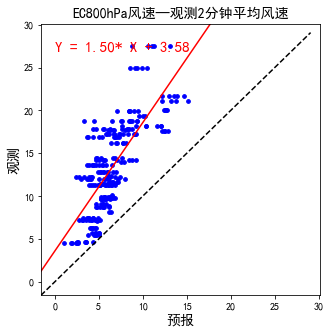

In [5]:
sta = nvb.in_hour_list(sta_all_max,[8,20])
ob = sta["ob"].values
ec800 = sta["ec800"].values
nvm.continuous.plot.scatter_regress(ob,ec800,title = "EC800hPa风速—观测2分钟平均风速",rtype = "linear")

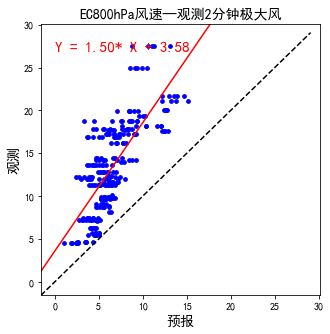

相关系数：0.7502963829635537


In [6]:
sta = nvb.in_hour_list(sta_all_max,[8,20])
ob = sta["ob"].values
ec800 = sta["ec800"].values
nvm.continuous.plot.scatter_regress(ob,ec800,title="EC800hPa风速—观测2分钟极大风",rtype = "linear")
corr = nvm.continuous.score.corr(ob,ec800)
print("相关系数：" + str(corr))

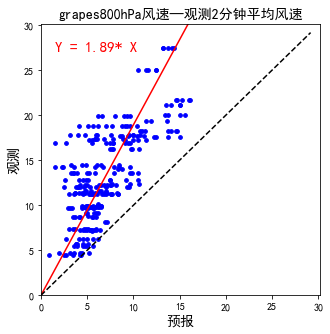

In [7]:
sta = nvb.in_hour_list(sta_all_max,[8,20])
ob = sta["ob"].values
grapes800 = sta["grapes800"].values
nvm.continuous.plot.scatter_regress(ob,grapes800,title = "grapes800hPa风速—观测2分钟平均风速",rtype = "rate")

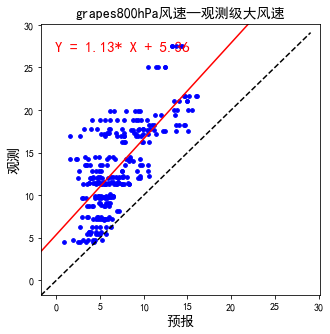

相关系数：0.7194849181420337


In [8]:
sta = nvb.in_hour_list(sta_all_max,[8,20])
ob = sta["ob"].values
grapes800 = sta["grapes800"].values
nvm.continuous.plot.scatter_regress(ob,grapes800,title = "grapes800hPa风速—观测级大风速",rtype = "linear")
corr = nvm.continuous.score.corr(ob,grapes800)
print("相关系数：" + str(corr))

In [9]:
ip, port = nvb.read_gds_ip_port(r"H:\test_data\input\nvb\ip_port.txt")

In [10]:
filename_list = nvb.path_tools.get_gds_file_list_in_one_dir(ip, port, r"SURFACE/PLOT_10MIN_OLYMPIC")

In [11]:
sta = nvb.read_stadata_from_gds(ip,port, r"SURFACE/PLOT_5MIN_OLYMPIC/20200116180000.000",element_id = nvb.gds_element_id.极大风速)
print(sta)

Traceback (most recent call last):
  File "s:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 2890, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'id'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "h:\task\develop\python\git\nmc_verification\nmc_verification\nmc_vf_base\io\read_stadata.py", line 396, in read_stadata_from_gds
    sta2 = nmc_verification.nmc_vf_base.basicdata.sta_data(sta)
  File "h:\task\develop\python\git\nmc_verification\nmc_verification\nmc_vf_base\basicdata\sta_data.py", l

In [12]:
nvb.print_gds_file_values_names(ip,port, r"SURFACE/PLOT_5MIN_OLYMPIC/20200116180000.000")

测站高度
相对湿度
平均风向_2分钟
平均风速_2分钟
温度
气压


In [13]:
para ={
    "ob_dir_s":r"H:\test_data\yanqing\平均风速_2分钟\YYYYMMDDHH0000.000",
    "ob_dir_d":r"H:\test_data\yanqing\平均风向_2分钟\YYYYMMDDHH0000.000",
    "ob_dir_s_all": r"H:\task\other\201911-预报司-冬奥会检验\冬奥观测数据\timelist\ob_s_2min_mean.txt",
    "ob_dir_d_all": r"H:\task\other\201911-预报司-冬奥会检验\冬奥观测数据\timelist\ob_d_2min_mean.txt",
    "fo_grd_dir_u":r"H:\test_data\ecmwf\ugrd\800\YYMMDDHH.TTT",
    "fo_grd_dir_v":r"H:\test_data\ecmwf\vgrd\800\YYMMDDHH.TTT",
    "fo_sta_dir_u":r"H:\task\other\201911-预报司-冬奥会检验\冬奥观测数据\timelist\ec_u.txt",
    "fo_sta_dir_v":r"H:\task\other\201911-预报司-冬奥会检验\冬奥观测数据\timelist\ec_v.txt",
    "max_dh":72,
    "output_dir": r"Z:\verification_product\tiananmen\YYMMDDHH\EC_wind_3h_YYYYMMDDHH.JPG",
    "ob_ids" :[651701],
    "title":"EC_wind_800hPa_2min_3Hour"
}

In [14]:
import nmc_verification.nmc_vf_base as nvb
import nmc_verification.nmc_vf_product as nvp

SURFACE/PLOT_10MIN_OLYMPIC/20200116070000.000 not exist
SURFACE/PLOT_10MIN_OLYMPIC/20200116060000.000 not exist
SURFACE/PLOT_10MIN_OLYMPIC/20200116050000.000 not exist
SURFACE/PLOT_10MIN_OLYMPIC/20200116040000.000 not exist
SURFACE/PLOT_10MIN_OLYMPIC/20200116030000.000 not exist
SURFACE/PLOT_10MIN_OLYMPIC/20200116020000.000 not exist
SURFACE/PLOT_10MIN_OLYMPIC/20200116010000.000 not exist
SURFACE/PLOT_10MIN_OLYMPIC/20200116000000.000 not exist
SURFACE/PLOT_10MIN_OLYMPIC/20200115230000.000 not exist
SURFACE/PLOT_10MIN_OLYMPIC/20200115220000.000 not exist
SURFACE/PLOT_10MIN_OLYMPIC/20200115210000.000 not exist
SURFACE/PLOT_10MIN_OLYMPIC/20200115200000.000 not exist
SURFACE/PLOT_10MIN_OLYMPIC/20200115190000.000 not exist
SURFACE/PLOT_10MIN_OLYMPIC/20200115180000.000 not exist
SURFACE/PLOT_10MIN_OLYMPIC/20200115170000.000 not exist
SURFACE/PLOT_10MIN_OLYMPIC/20200115160000.000 not exist
SURFACE/PLOT_10MIN_OLYMPIC/20200115150000.000 not exist
SURFACE/PLOT_10MIN_OLYMPIC/20200115140000.000 no

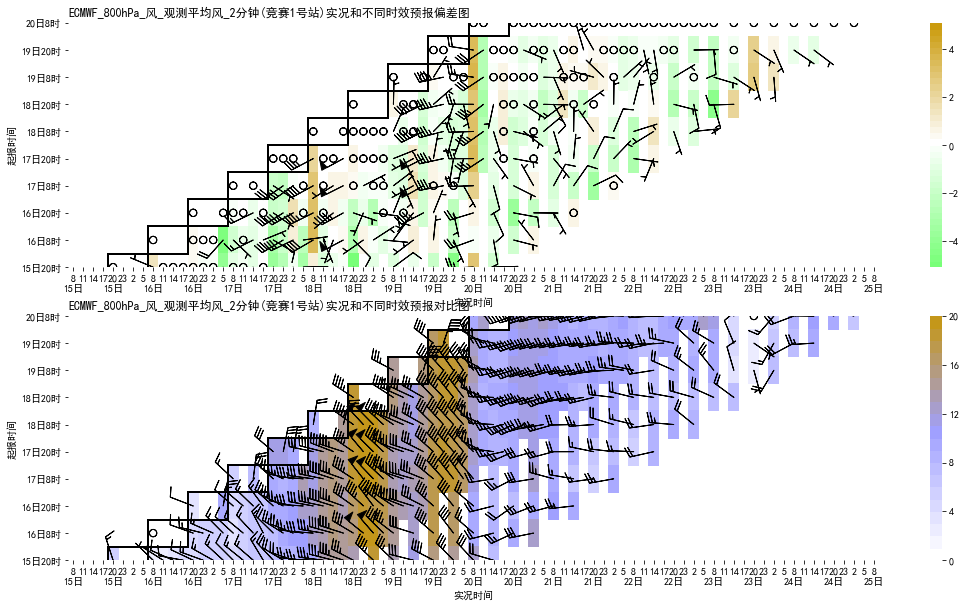

In [15]:

nvp.presentation.jupyter_ob_multi_fo_time(ob_element,model_name,model_element,level,station_id,max_dh)